**🎓 Project: Chance of Admission Prediction**

🎯** Objective**
To build a machine learning model that predicts the probability of a student getting admitted to a university based on academic and profile features like GRE, TOEFL, CGPA, etc.

**🔗 Data Source**
Dataset: Admission Chance CSV (YBI Foundation) [link text](https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv)

**📄 Dataset Overview **
This dataset is designed to help predict a student’s likelihood of being accepted into a graduate program based on various academic and profile-related attributes. Each record in the dataset represents an individual applicant and includes the following features:

GRE Score – Graduate Record Examination score, a standardized test often required for graduate admissions.

TOEFL Score – Test of English as a Foreign Language score, assessing English language proficiency.

University Rating – A numerical indicator of the university’s quality or prestige (typically rated from 1 to 5).

SOP – Strength of the applicant’s Statement of Purpose, rated on a scale.

LOR – Quality of Letters of Recommendation, rated similarly.

CGPA – Cumulative Grade Point Average, measuring overall academic performance.

Research – A binary value (0 or 1) indicating whether the applicant has prior research experience.

Chance of Admit – The target variable representing the estimated probability of admission, ranging between 0 and 1.

This dataset is often used in machine learning tasks related to regression and prediction modeling in educational analytics.



**📚 Import Libraries**

In [ ]:
# importing the libraries required

import pandas as pd     # it handles and anlayzes structured data
import numpy as np      # it is used for numerical operations
import matplotlib.pyplot as plt   # used to visualize the data
import seaborn as sns            # more advanced visualization

from sklearn.model_selection import train_test_split   # it helps in splittting the data into training and test sets
from sklearn.linear_model import LinearRegression      # it is a linear regression algorithm
from sklearn.metrics import mean_squared_error, r2_score    # it evaluates model performance


**📥 Import Data**

In [ ]:
url = "https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv"
df = pd.read_csv(url)

**📊 Describe Data**

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop unnamed column if it exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# View first few rows
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
# Summary statistics
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**📈 Data Visualization**

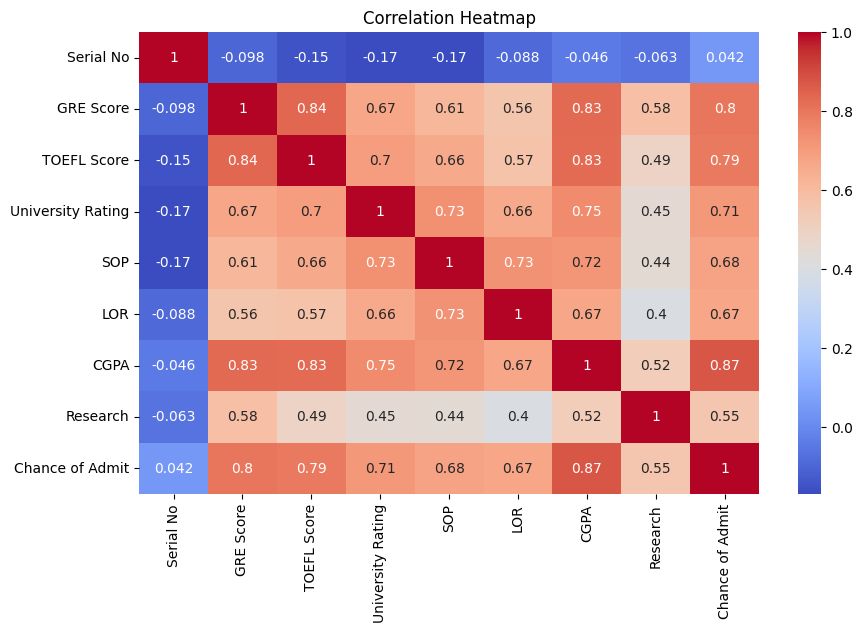

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**🧹 Data Preprocessing**

In [ ]:
# Check each column to see how many missing (null) values it has
df.isnull().sum()


,0
Serial No,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**🎯 Define Target Variable (y) and Feature Variables (X)**

In [ ]:
# Clean column names again just in case
df.columns = df.columns.str.strip()

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

**🔀 Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**🤖 Modeling**

In [ ]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

**📏 Model Evaluation**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)      # Measures how well the model fits
mse = mean_squared_error(y_test, y_pred)  # Shows average prediction error

# Print results
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")


R² Score: 0.8212
MSE: 0.0046


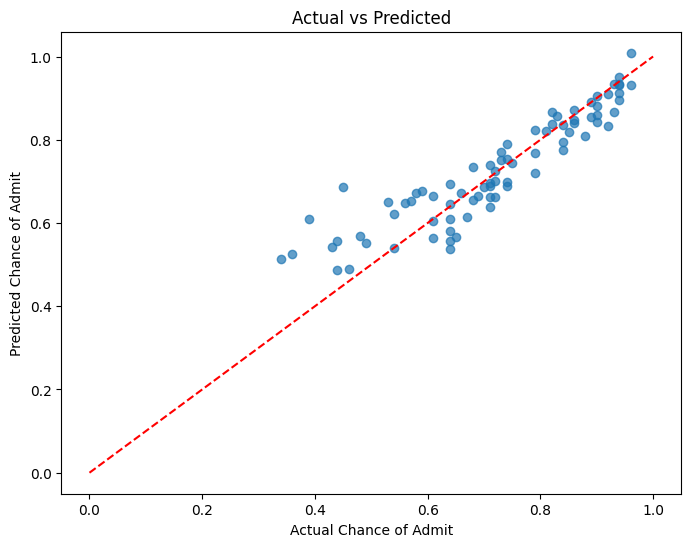

In [ ]:
# Plot actual vs predicted values to see how well the model did
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted")
plt.plot([0, 1], [0, 1], 'r--')  # Reference line for perfect predictions
plt.show()


**🔮 Prediction**

In [ ]:
# Predict on a sample student profile
sample = pd.DataFrame({
    'Serial No': [0],  # Add a placeholder for Serial No as it was in the training data
    'GRE Score': [325],
    'TOEFL Score': [112],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR': [4],
    'CGPA': [9.1],
    'Research': [1]
})

predicted_chance = model.predict(sample)
print(f"Predicted Chance of Admission: {predicted_chance[0]:.2f}")

Predicted Chance of Admission: 0.80


**📘 Explanation **
In this project, we used a Linear Regression model to predict a student's chance of admission by looking at key factors like their academic scores and research background.

The results show that features such as CGPA, GRE, and TOEFL scores have a significant impact on the likelihood of getting admitted. These variables are closely linked to the admission chances, meaning they play an important role in the model’s predictions.

The R² Score helps us understand how well the model captures the relationship between these features and the admission probability. A higher R² value means the model does a good job of explaining the variations in the data, giving us confidence in its predictions.